In [1]:
%load_ext tensorboard

In [9]:
!accelerate launch train_text_to_image_lora.py\
    --mixed_precision="fp16"\
    --pretrained_model_name_or_path="stable-diffusion-v1-5/stable-diffusion-v1-5"\
    --train_data_dir="dataset"\
    --resolution=512\
    --center_crop\
    --random_flip\
    --train_batch_size=1\
    --gradient_accumulation_steps=4\
    --max_train_steps=15000\
    --learning_rate=1e-04\
    --max_grad_norm=1\
    --lr_scheduler="cosine"\
    --lr_warmup_steps=0\
    --output_dir="./lora_output2"\
    --report_to=tensorboard\
    --checkpointing_steps=5000\
    --seed=7845

02/07/2025 13:47:04 - INFO - __main__ - Distributed environment: DistributedType.NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'sample_max_value', 'timestep_spacing', 'clip_sample_range', 'rescale_betas_zero_snr', 'dynamic_thresholding_ratio', 'variance_type', 'thresholding', 'prediction_type'} was not found in config. Values will be initialized to default values.
{'shift_factor', 'mid_block_add_attention', 'force_upcast', 'scaling_factor', 'latents_mean', 'use_quant_conv', 'use_post_quant_conv', 'latents_std'} was not found in config. Values will be initialized to default values.
{'num_attention_heads', 'projection_class_embeddings_input_dim', 'resnet_out_scale_factor', 'cross_attention_norm', 'addition_embed_type_num_heads', 'reverse_transformer_layers_per_block', 'conv_in_kernel', 'transformer_layers_per_block', 'time_embedding_act_fn', 'encoder_hid_dim', 'use_linear_projection', 'addition_time_embed_dim', 'resnet_time_scale_s

In [2]:
%tensorboard --logdir='./lora_output2/logs'

In [11]:
from diffusers import DiffusionPipeline
import torch

pipe_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipe = DiffusionPipeline.from_pretrained(pipe_id, torch_dtype=torch.float16).to("cuda")

/home/bob1ch/Рабочий стол/NN-NLP/LoRA2/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|████████████████████████████████████████████████| 7/7 [00:01<00:00,  6.64it/s]


In [12]:
pipe.load_lora_weights("lora_output2", weight_name="pytorch_lora_weights.safetensors", adapter_name="wolf")

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:44<00:00,  5.57it/s]


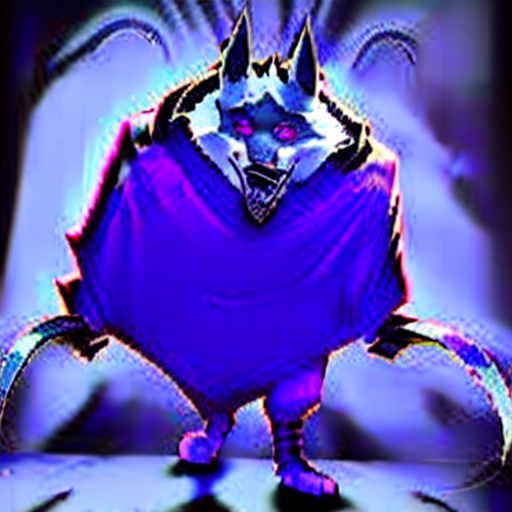

In [13]:
prompt = "a wolf with sickles high quality"

lora_scale = 1
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:45<00:00,  5.53it/s]


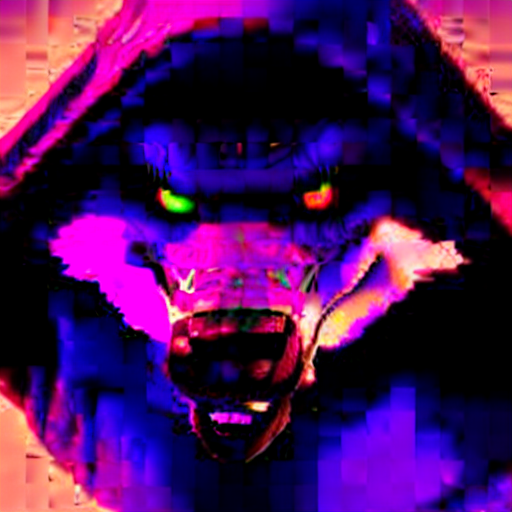

In [14]:
prompt = "a wolf looks forward"

lora_scale = 1
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:45<00:00,  5.50it/s]


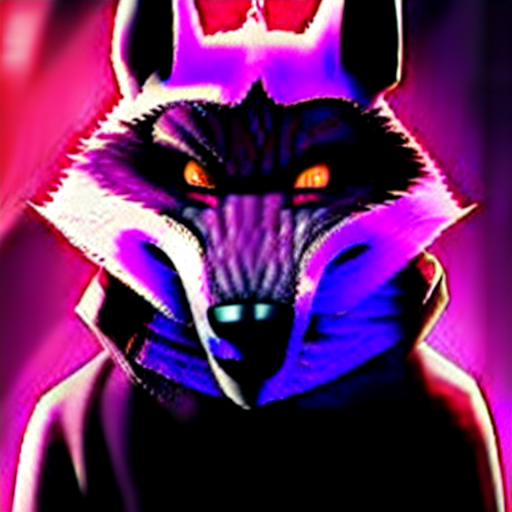

In [15]:
prompt = "a wolf with an evil look"

lora_scale = 1
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:46<00:00,  5.38it/s]


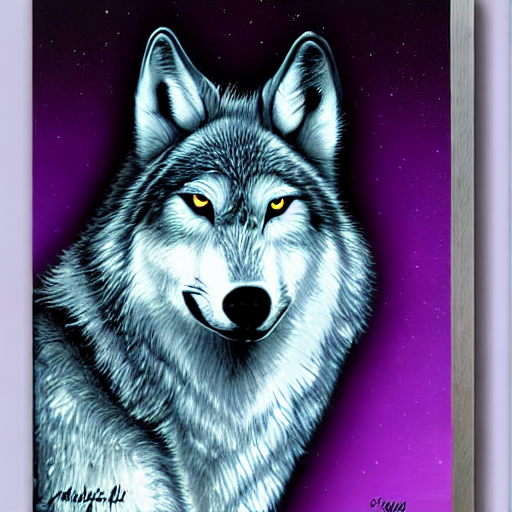

In [16]:
prompt = "a wolf with sickles high quality"

lora_scale = 0
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:46<00:00,  5.35it/s]


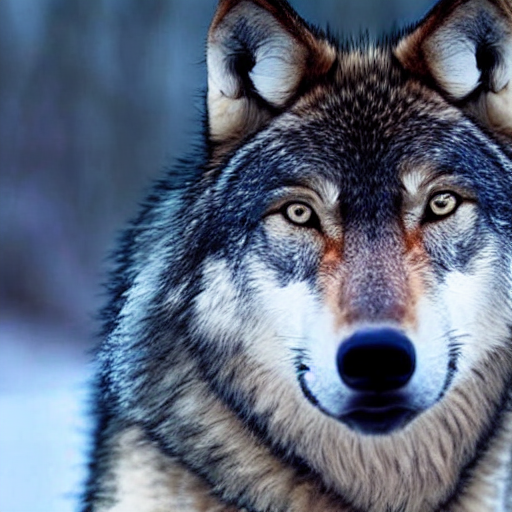

In [17]:
prompt = "a wolf looks forward"

lora_scale = 0
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image

100%|████████████████████████████████████████████████████████████████████████████| 250/250 [00:47<00:00,  5.31it/s]


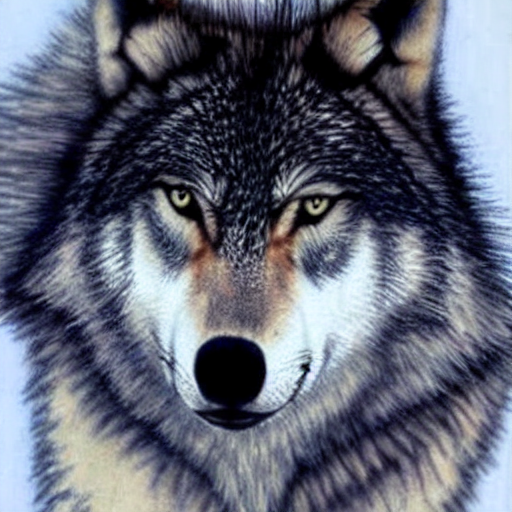

In [18]:
prompt = "a wolf with an evil look"

lora_scale = 0
image = pipe(
    prompt, num_inference_steps=250, cross_attention_kwargs={"scale": lora_scale}, generator=torch.manual_seed(0)
).images[0]
image